# Applying Euclidean distance only to High level features

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 
import math
from ipynb.fs.full.Utils import createKDeplot
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
from scipy import stats

def applyLogTransformation(df, features, suffix):
    newFeatures = []
    for feature in features:
#         df[feature + '_log'] = np.sqrt(df[feature])
    
        df[feature + suffix] = stats.boxcox(df[feature])[0]
        newFeatures.append(feature + suffix)
        print('skewnees before:', df[feature].skew(), ' after: ', df[feature + suffix].skew())
        
    createKDeplot(df,newFeatures)

In [4]:
df = pd.read_csv('./data/05-RawData.csv')
encodedFeaturesNames = pd.read_csv('./data/05-encodedFeatureNames.csv')
encodedFeaturesNames = encodedFeaturesNames['0'].values.tolist()

In [5]:
# Separating encodedFeatures from continous features
encodedFeatures = df[encodedFeaturesNames]
featuresToScale = df.drop(encodedFeaturesNames, axis=1)


In [6]:
featuresToScale

,Unnamed: 0,id,danceability,energy,speechiness,acousticness,liveness,valence,tempo,year,...,1276,1278,1281,1286,1287,1288,1290,1292,1294,1295
0,0,23,0.494,0.756,0.0432,0.001400,0.1640,0.589,133.337,1973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,105,0.582,0.744,0.0336,0.000458,0.0405,0.674,133.344,1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,118,0.614,0.755,0.0276,0.016200,0.0831,0.645,92.622,1980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,120,0.319,0.807,0.0388,0.001040,0.1310,0.601,118.097,1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,292,0.496,0.527,0.0339,0.195000,0.1380,0.283,155.932,2000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,3184,3781055,0.591,0.764,0.0483,0.038300,0.1030,0.478,169.928,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3185,3185,3860363,0.539,0.508,0.0288,0.727000,0.1740,0.227,101.358,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3186,3186,3898172,0.644,0.315,0.0339,0.706000,0.0962,0.356,60.001,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3187,3187,3911342,0.604,0.366,0.0282,0.578000,0.1330,0.130,141.981,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
stats.boxcox(featuresToScale['danceability'])

(array([-0.49470537, -0.41059538, -0.37977148, ..., -0.35076749,
        -0.38941681, -0.46996017]),
 1.0728121664221146)

In [8]:
ids = featuresToScale.id

In [9]:
ids

0            23
1           105
2           118
3           120
4           292
         ...   
3184    3781055
3185    3860363
3186    3898172
3187    3911342
3188    4134073
Name: id, Length: 3189, dtype: int64

In [10]:
featuresToScale = featuresToScale.iloc[:, 2:]

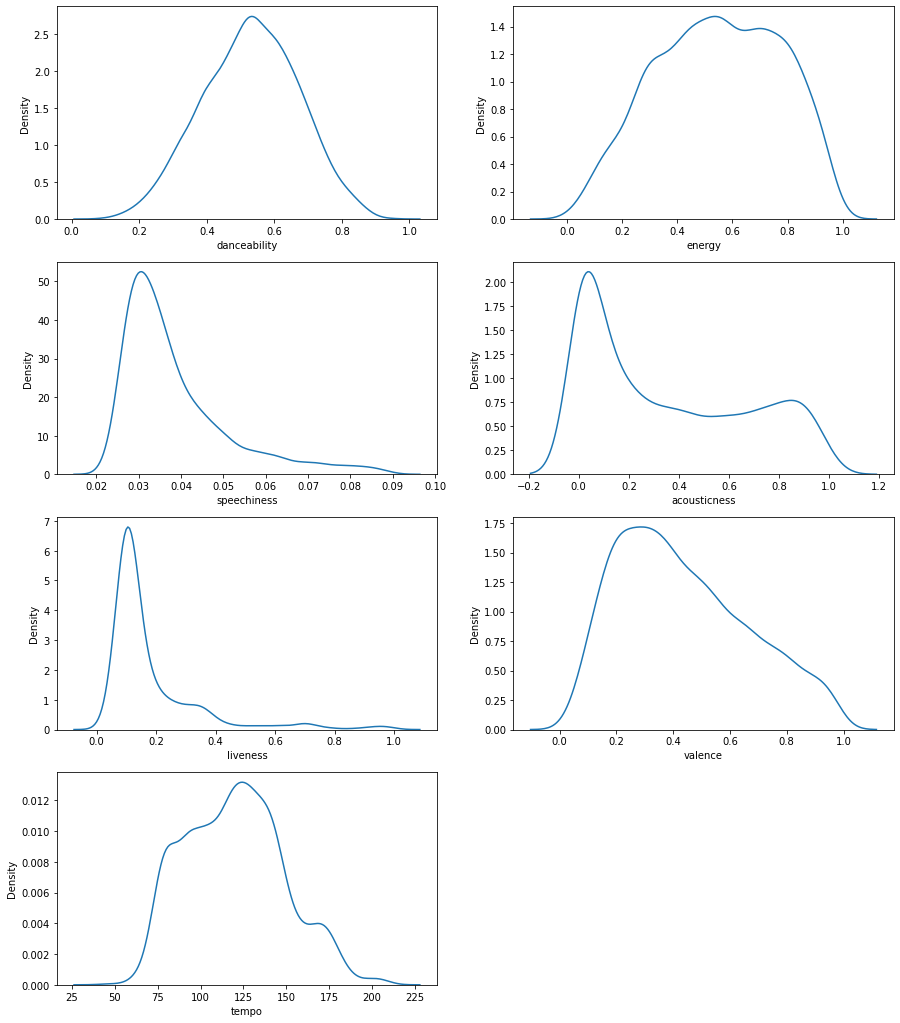

In [11]:
createKDeplot(featuresToScale,['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'])

## Managing Skewed variables

In [12]:
## Box Cox requires values different than 0 so no need to add a constant to fix it
featuresToScale[featuresToScale.valence == 0]

,danceability,energy,speechiness,acousticness,liveness,valence,tempo,year,0,1,...,1276,1278,1281,1286,1287,1288,1290,1292,1294,1295


skewnees before: 1.6265382111386124  after:  0.1255128804635066
skewnees before: 0.5075825883514323  after:  -0.31918009428475286
skewnees before: 2.672849631288445  after:  -0.01931234528357721
skewnees before: 0.48565159581018225  after:  -0.06584258014357276


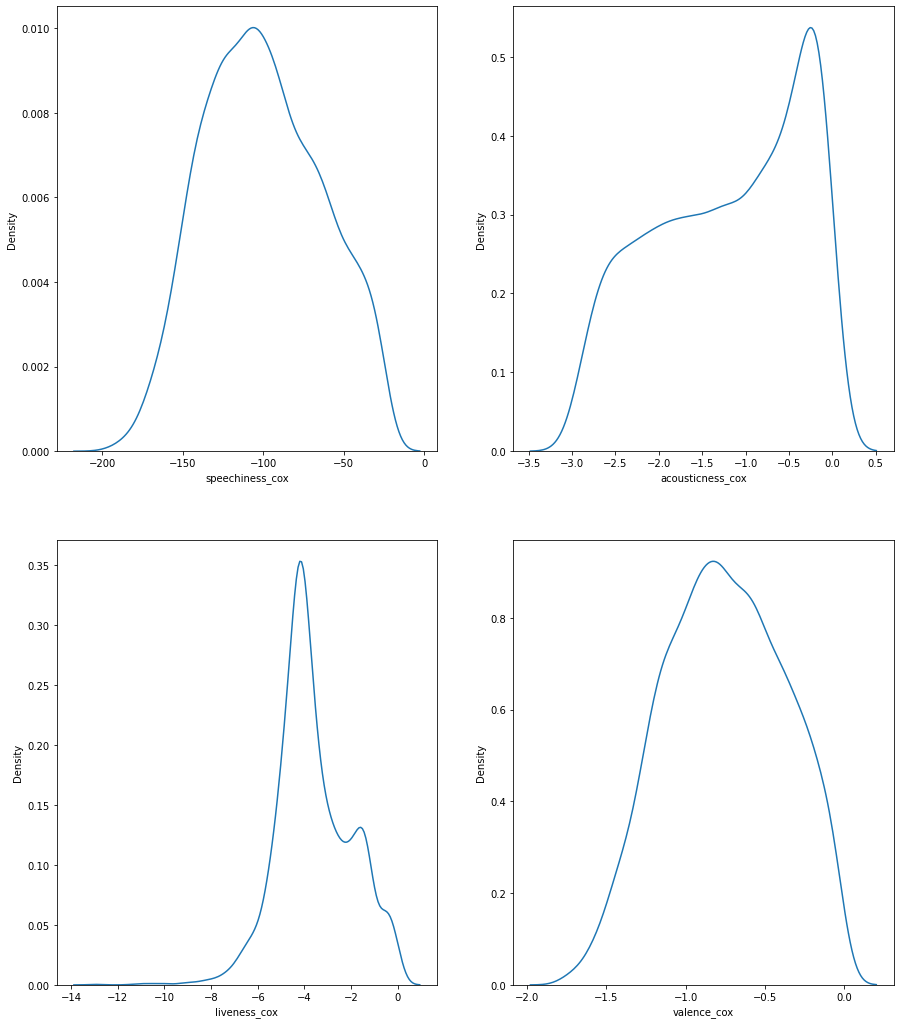

In [13]:
applyLogTransformation(featuresToScale, ['speechiness', 'acousticness', 'liveness', 'valence'], '_cox')

## Defining dataset

In [14]:
dfTransformed = featuresToScale[['speechiness_cox' ,'danceability', 'energy', 'acousticness_cox', 'liveness_cox', 'valence_cox', 'tempo']]

## Centering variables with different means

In [15]:
X = dfTransformed - dfTransformed.mean()
X.describe().round(2)

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
count,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,36.23,0.14,0.22,0.85,1.59,0.38,28.69
min,-95.91,-0.44,-0.55,-1.76,-9.33,-1.00,-76.61
25%,-27.59,-0.10,-0.17,-0.72,-0.94,-0.28,-23.26
50%,-2.36,0.00,0.00,0.11,-0.32,-0.01,0.08
75%,27.32,0.10,0.18,0.79,1.07,0.29,19.64
max,75.56,0.42,0.44,1.20,3.60,0.73,90.94


## Scaling variables with different variance

In [16]:
X = dfTransformed / dfTransformed.std()
X.describe().round(2)

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
count,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00
mean,-2.76,3.73,2.44,-1.41,-2.27,-2.00,4.18
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.41,0.64,0.01,-3.48,-8.15,-4.65,1.51
25%,-3.52,3.03,1.66,-2.25,-2.87,-2.74,3.37
50%,-2.82,3.76,2.46,-1.29,-2.47,-2.01,4.18
75%,-2.01,4.44,3.25,-0.48,-1.60,-1.23,4.86
max,-0.67,6.66,4.41,-0.00,-0.01,-0.06,7.35


## Combining Centering and Scaling

In [17]:
cols = dfTransformed.columns
scaler = StandardScaler()
scaler.fit(dfTransformed)
data_normalized = scaler.transform(dfTransformed)
print('mean: ', data_normalized.mean(axis=0).round(2))
print('std: ', data_normalized.std(axis=0).round(2))

df = pd.DataFrame(data_normalized, columns=cols)

mean:  [-0.  0.  0. -0.  0. -0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1.]


In [18]:
df.iloc[0, :]

speechiness_cox     0.747202
danceability       -0.253839
energy              0.930385
acousticness_cox   -1.726938
liveness_cox        0.381471
valence_cox         0.744627
tempo               0.469546
Name: 0, dtype: float64

## Applying eucledian distance

In [19]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [20]:
coverSongId = 1686718
coverSongIndex = ids[ids == coverSongId].index[0]
coverSongVector = df.iloc[coverSongIndex, :]

In [23]:
originalSongId = 180849 # THe Scientist original
originalIndex = ids[ids == originalSongId].index[0]
originalSongVector = df.iloc[originalIndex, :]

In [22]:
coverSongVector

speechiness_cox    -0.966642
danceability       -1.379839
energy             -1.319282
acousticness_cox    1.049325
liveness_cox       -0.740484
valence_cox        -0.970770
tempo               1.185773
Name: 2641, dtype: float64

In [53]:
df

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
0,0.747202,-0.253839,0.930385,-1.726938,0.381471,0.744627,0.469546
1,-0.179867,0.365461,0.876821,-1.851441,-2.946618,1.036307,0.469790
2,-1.192145,0.590661,0.925921,-1.224244,-0.937610,0.939236,-0.950043
3,0.393090,-1.485402,1.158030,-1.764670,-0.003912,0.787172,-0.061819
4,-0.140787,-0.239764,-0.091785,-0.067796,0.089440,-0.570924,1.257354
...,...,...,...,...,...,...,...
3184,1.059494,0.428799,0.966094,-0.926116,-0.469583,0.325653,1.745346
3185,-0.947204,0.062848,-0.176594,1.056589,0.475711,-0.890443,-0.645450
3186,-0.140787,0.801786,-1.038074,1.025850,-0.612842,-0.203722,-2.087423
3187,-1.066422,0.520286,-0.810429,0.823835,0.023521,-1.572435,0.770932


In [24]:
ranking = []
for index in range(0, len(df)):
    ranking.append([ids[index], euclidean_distance(df.iloc[index, :], coverSongVector)])
ranking    

[[23, 4.657050829627313],
 [105, 5.129368574256904],
 [118, 4.7320686884143734],
 [120, 4.5940227251099675],
 [292, 2.3643792555351797],
 [407, 5.061123161937026],
 [418, 4.520070549159638],
 [456, 3.4220611873780036],
 [467, 4.521166199208203],
 [469, 4.933348606945888],
 [635, 2.599524266100133],
 [652, 3.7920512812396323],
 [816, 5.070530215698159],
 [830, 2.865366663943951],
 [836, 3.767959649382384],
 [1334, 4.7051206650644195],
 [1345, 3.1141750933724888],
 [1395, 4.634864475610089],
 [1433, 3.92957864601499],
 [2147, 4.679939234039127],
 [2148, 4.383660573246555],
 [2220, 3.799167824059166],
 [2535, 5.9560405838252555],
 [3118, 4.3919772063249525],
 [3165, 2.3698844560113814],
 [3337, 3.6014300971886226],
 [3991, 4.794808166824667],
 [4019, 4.372430339819315],
 [4041, 3.765931516792432],
 [4084, 4.312908068631561],
 [4169, 3.925234900972261],
 [5643, 4.544010747998995],
 [5909, 6.039214621070744],
 [6090, 4.418162242430754],
 [6097, 4.548081831895899],
 [6109, 3.1056675231326643

In [25]:
ranksDF = pd.DataFrame(ranking)
ranksDF = ranksDF.rename(columns={0: "id", 1: "rank"})
ranksDF

,id,rank
0,23,4.657051
1,105,5.129369
2,118,4.732069
3,120,4.594023
4,292,2.364379
...,...,...
3184,3781055,4.309168
3185,3860363,2.868183
3186,3898172,4.103611
3187,3911342,2.246777


In [26]:
ranksDF = ranksDF.sort_values(by="rank")
ranksDF.reset_index(drop=True, inplace=True)
ranksDF

,id,rank
0,1686718,0.000000
1,903795,0.598725
2,340088,0.733403
3,431444,0.809299
4,1486963,0.845344
...,...,...
3184,2956883,6.614809
3185,212734,6.620667
3186,857088,6.628660
3187,961594,6.666155


🥳 First recommendation

In [28]:
ranksDF[ranksDF['id']==coverSongId]

,id,rank
0,1686718,0.0


### Rank of the song is 264 original vs cover